# Importing Modules

In [1]:
import import_ipynb
import BilateralCFAR_v2 as bcfarv2
import GeoProcess as gp
import numpy as np
#import PreProcess_LM as lm


DATA_PATH = '/media/prsd/New Volume/Dissertation/'

importing Jupyter notebook from BilateralCFAR_v2.ipynb
importing Jupyter notebook from GeoProcess.ipynb


In [2]:
# terrain_corr_product = lm.import_product('Dataset_963A/terrain_corr_subset_of_S1A_IW_GRDH_1SDV_20200825T010320_20200825T010345_034056_03F420_963A_TC.tif')
# amp_vh,amp_vv = lm.bands(terrain_corr_product)
# lm_mask_ = lm.LandMasking(terrain_corr_product,amp_vh,DATA_PATH)

In [3]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'Dataset_963A/LandMasked_SubsetAmplitude_VH.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
print(rows,col)
#gp.visualizeImg(band_data_arr)
#gp.save_img2Geotiff(subset_img,DATA_PATH+'Results/BilateralCFAR/Input.tif')

10201 10596


(357, 400)
Image Saved Succesfully.


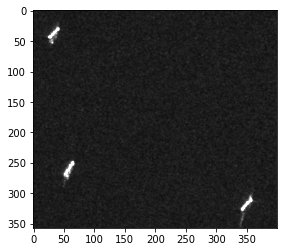

In [4]:
#subset_img = (gp.subsetImg(band_data_arr,2000,4500)) #single ship
# subset_img = gp.subsetImg(band_data_arr,4950,8700) #multiple ship.

subset_img = band_data_arr[2518:2875,3882:4282]
# # # #subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'Results/BilateralCFAR/Input.tif')

In [5]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 88
guardWindow_size = 52
targetWindow_size = 80
pfa = 0.95

In [7]:
print("CFAR Version 2")
bilateralcfar = bcfarv2.BilateralCFAR_v2(subset_img,targetWindow_size,guardWindow_size,backgroundWindow_size,pfa,1)
i_combined, i_spatial = bilateralcfar.computeDVnThreshold()

  0%|          | 0/357 [00:00<?, ?it/s]

CFAR Version 2
Kernel Ready.
Computing DVi and Threshold..


100%|██████████| 357/357 [00:16<00:00, 22.10it/s]

Process completed, DV image and Threshold Image succesfully Computed.



Image Saved Succesfully.


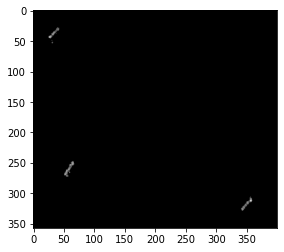

In [8]:
gp.visualizeBinaryImg(i_combined)
gp.save_img2Geotiff(i_combined,DATA_PATH+'Results/BilateralCFAR/Output_DVICOMBINEDbilateralCFAR'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


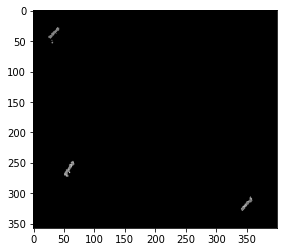

In [9]:
gp.visualizeBinaryImg(i_spatial)
gp.save_img2Geotiff(i_spatial,DATA_PATH+'Results/BilateralCFAR/Output_ISPATIALbilateralCFAR'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

In [ ]:
gp.visualizeBinaryImg(T_bilateral)
gp.save_img2Geotiff(T_bilateral,DATA_PATH+'Results/BilateralCFAR/Output_TbilateralCFAR'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')